In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [22]:
# load dataset

dataFrame = pd.read_csv("Iris.csv")
dataFrame.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check the data if there's a NaN value

dataFrame.isna().values.any()

False

In [4]:
# check the features 

print(dataFrame.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
# prepare the training set
# x = memilih semua fitur kecuali kolom terakhir
# y = memilih target yaitu kolom terakhir

x = dataFrame.iloc[:, :-1]
y = dataFrame.iloc[:, -1]

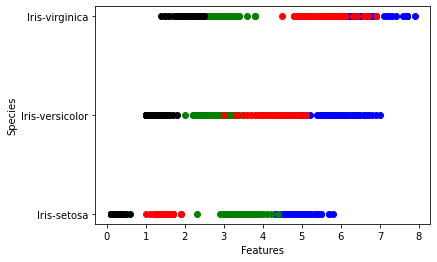

In [6]:
# plot the relation of each features to the target

plt.xlabel("Features")
plt.ylabel("Species")

pltX = dataFrame.loc[:, "SepalLengthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="blue", label="SepalLengthCm")

pltX = dataFrame.loc[:, "SepalWidthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="green", label="SepalWidthCm")

pltX = dataFrame.loc[:, "PetalLengthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="red", label="PetalLengthCm")

pltX = dataFrame.loc[:, "PetalWidthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="black", label="PetalWidthCm")

In [8]:
# split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
# train the model 

model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(max_iter=1000, multi_class='warn', solver='warn')

In [36]:
# test the model
predictions = model.predict(x_test)
print(predictions)


['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [20]:
# check precision, recall, f1-score

print(classification_report(y_test, predictions))
print("accuracy: ", accuracy_score(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

accuracy:  1.0
